<a href="https://colab.research.google.com/github/LucasCod-eng/Deep-Learning/blob/main/Deep_Learning_A_Z_Mapa_Auto_Organiz%C3%A1veis_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=0b2ad0c6bdb1a37a1e52ed955b3a306673beccd1162ff7193141cb63f84cda81
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [2]:
import minisom
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [3]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot
from minisom import MiniSom

In [47]:
base = pd.read_csv('credit_data.csv')
base

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [48]:
base.isna().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [49]:
#fazendo tratamento
base = base.dropna()

In [50]:
base.shape

(1997, 5)

In [51]:
base.loc[base['age']< 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [52]:
base['age'].mean()

40.80755937840458

In [53]:
base.loc[base['age'] > 0].mean()

,0
clientid,1003.431795
income,45328.856915
age,40.927700
loan,4443.240892
default,0.141926


In [54]:
base.loc[base.age < 0, 'age' ] = 40.92

In [55]:
base.loc[base['age'] < 0]

,clientid,income,age,loan,default


In [56]:
X = base.iloc[: , 0:4].values
y = base.iloc[:, 4].values

In [57]:
X

array([[1.00000000e+00, 6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [2.00000000e+00, 3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [3.00000000e+00, 5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [1.99800000e+03, 4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [1.99900000e+03, 4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [2.00000000e+03, 6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [58]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [59]:
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [60]:
X

array([[0.00000000e+00, 9.23175898e-01, 8.92091749e-01, 5.88837391e-01],
       [5.00250125e-04, 2.88121646e-01, 6.54707879e-01, 4.76826954e-01],
       [1.00050025e-03, 7.46334292e-01, 9.81188803e-01, 5.82620111e-01],
       ...,
       [9.98999500e-01, 4.86122016e-01, 2.16958067e-01, 4.01128949e-01],
       [9.99499750e-01, 4.75009983e-01, 1.00000000e+00, 1.17790295e-01],
       [1.00000000e+00, 9.88813673e-01, 8.29709134e-01, 5.35970280e-01]])

Criação do mapa auto organizável

In [61]:
som = MiniSom(x = 15, y = 15, input_len= 4, random_seed=0 )
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

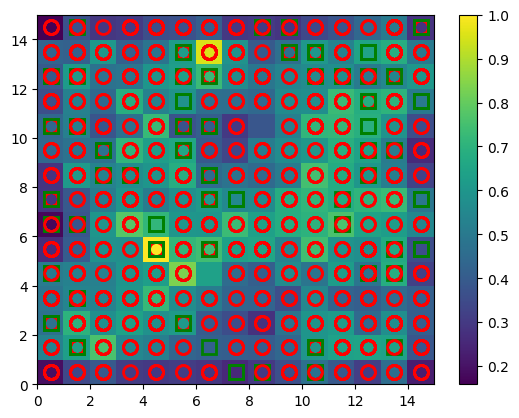

In [63]:
pcolor(som.distance_map().T)
colorbar()


markers = ['o', 's']
colors = ['r', 'g']

for i , x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, w[1] + 0.5, markers[int(y[i])],
       markerfacecolor = 'None', markersize = 10,
       markeredgecolor = colors[y[i]],   markeredgewidth = 2)

In [64]:
mapeamento = som.win_map(X)
mapeamento

defaultdict(list,
            {(8, 9): [array([0.        , 0.9231759 , 0.89209175, 0.58883739]),
              array([0.04502251, 0.88555995, 0.94488088, 0.54622831]),
              array([0.06403202, 0.98320605, 0.76999752, 0.53494606]),
              array([0.07503752, 0.99168174, 0.86463389, 0.78947487]),
              array([0.11505753, 0.91492837, 0.74581546, 0.56108804]),
              array([0.14607304, 0.95582021, 0.76894078, 0.69788224])],
             (14,
              9): [array([5.00250125e-04, 2.88121646e-01, 6.54707879e-01, 4.76826954e-01]), array([0.004002  , 0.41296337, 0.81542749, 0.3454094 ]), array([0.01150575, 0.15668515, 0.73863113, 0.36023692]), array([0.01850925, 0.24908572, 0.70061399, 0.31423393]), array([0.03101551, 0.23285166, 0.95757541, 0.37412386]), array([0.03451726, 0.26341331, 0.68626126, 0.33568686]), array([0.11805903, 0.29707836, 0.80384172, 0.43876045])],
             (4, 10): [array([0.0010005 , 0.74633429, 0.9811888 , 0.58262011]),
              

In [70]:
suspeitos = np.concatenate((mapeamento[(4, 5)], mapeamento[(6, 13)]), axis = 0)
suspeitos

array([[0.60030015, 0.89212414, 0.32682387, 0.81827683],
       [0.68934467, 0.99519088, 0.57688264, 1.        ],
       [0.71785893, 0.83675961, 0.25024275, 0.79701105],
       [0.7833917 , 0.93890061, 0.09768899, 0.89934912],
       [0.7863932 , 0.89936976, 0.22484469, 0.83506183],
       [0.7923962 , 0.94585764, 0.18886874, 0.97172083],
       [0.8084042 , 0.96683576, 0.3545402 , 0.93277323],
       [0.83391696, 0.91833222, 0.10309697, 0.94234278],
       [0.16208104, 0.84084423, 0.95814162, 0.55520775],
       [0.17208604, 0.83600631, 0.84724841, 0.40813463],
       [0.17858929, 0.80245223, 0.97686696, 0.5222044 ],
       [0.20210105, 0.85110366, 0.99898032, 0.33711858],
       [0.24062031, 0.72564276, 0.96511268, 0.59675812],
       [0.24212106, 0.71866914, 0.92994809, 0.40987548],
       [0.24912456, 0.58222493, 0.9457653 , 0.46404825],
       [0.26813407, 0.62237741, 0.88142384, 0.47006204],
       [0.28414207, 0.72220061, 0.97512053, 0.67924811],
       [0.30115058, 0.80089704,

In [71]:
suspeitos = normalizador.inverse_transform(suspeitos)
suspeitos

array([[1.20100000e+03, 6.46039209e+04, 3.30618318e+01, 1.12646912e+04],
       [1.37900000e+03, 6.97553202e+04, 4.45436823e+01, 1.37660512e+04],
       [1.43600000e+03, 6.18367356e+04, 2.95454866e+01, 1.09719746e+04],
       [1.56700000e+03, 6.69418649e+04, 2.25407356e+01, 1.23806247e+04],
       [1.57300000e+03, 6.49660656e+04, 2.83792937e+01, 1.14957311e+04],
       [1.58500000e+03, 6.72895857e+04, 2.67274005e+01, 1.33767977e+04],
       [1.61700000e+03, 6.83380974e+04, 3.43344715e+01, 1.28406967e+04],
       [1.66800000e+03, 6.59138320e+04, 2.27890518e+01, 1.29724184e+04],
       [3.25000000e+02, 6.20408896e+04, 6.20498010e+01, 7.64363105e+03],
       [3.45000000e+02, 6.17990850e+04, 5.69579610e+01, 5.61921760e+03],
       [3.58000000e+02, 6.01220116e+04, 6.29096049e+01, 7.18935074e+03],
       [4.05000000e+02, 6.25536684e+04, 6.39249756e+01, 4.64170478e+03],
       [4.82000000e+02, 5.62829825e+04, 6.23698886e+01, 8.21555838e+03],
       [4.85000000e+02, 5.59344326e+04, 6.07552498e

In [72]:
classe = []
for i in range(len(base)):
  for j in range(len(suspeitos)):
    if base.iloc[i, 0] == suspeitos[j, 0]:
      classe.append(base.iloc[i, 4])
classe = np.asanyarray(classe)

In [73]:
classe, classe.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]), (19,))

In [75]:
suspeitos_final = np.column_stack((suspeitos, classe))

In [76]:
suspeitos_final

array([[1.20100000e+03, 6.46039209e+04, 3.30618318e+01, 1.12646912e+04,
        0.00000000e+00],
       [1.37900000e+03, 6.97553202e+04, 4.45436823e+01, 1.37660512e+04,
        0.00000000e+00],
       [1.43600000e+03, 6.18367356e+04, 2.95454866e+01, 1.09719746e+04,
        0.00000000e+00],
       [1.56700000e+03, 6.69418649e+04, 2.25407356e+01, 1.23806247e+04,
        0.00000000e+00],
       [1.57300000e+03, 6.49660656e+04, 2.83792937e+01, 1.14957311e+04,
        0.00000000e+00],
       [1.58500000e+03, 6.72895857e+04, 2.67274005e+01, 1.33767977e+04,
        0.00000000e+00],
       [1.61700000e+03, 6.83380974e+04, 3.43344715e+01, 1.28406967e+04,
        0.00000000e+00],
       [1.66800000e+03, 6.59138320e+04, 2.27890518e+01, 1.29724184e+04,
        0.00000000e+00],
       [3.25000000e+02, 6.20408896e+04, 6.20498010e+01, 7.64363105e+03,
        0.00000000e+00],
       [3.45000000e+02, 6.17990850e+04, 5.69579610e+01, 5.61921760e+03,
        0.00000000e+00],
       [3.58000000e+02, 6.0122

In [77]:
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]

In [78]:
suspeitos_final

array([[1.20100000e+03, 6.46039209e+04, 3.30618318e+01, 1.12646912e+04,
        0.00000000e+00],
       [4.82000000e+02, 5.62829825e+04, 6.23698886e+01, 8.21555838e+03,
        0.00000000e+00],
       [3.58000000e+02, 6.01220116e+04, 6.29096049e+01, 7.18935074e+03,
        0.00000000e+00],
       [3.25000000e+02, 6.20408896e+04, 6.20498010e+01, 7.64363105e+03,
        0.00000000e+00],
       [1.66800000e+03, 6.59138320e+04, 2.27890518e+01, 1.29724184e+04,
        0.00000000e+00],
       [1.61700000e+03, 6.83380974e+04, 3.43344715e+01, 1.28406967e+04,
        0.00000000e+00],
       [3.45000000e+02, 6.17990850e+04, 5.69579610e+01, 5.61921760e+03,
        0.00000000e+00],
       [1.57300000e+03, 6.49660656e+04, 2.83792937e+01, 1.14957311e+04,
        0.00000000e+00],
       [1.56700000e+03, 6.69418649e+04, 2.25407356e+01, 1.23806247e+04,
        0.00000000e+00],
       [1.43600000e+03, 6.18367356e+04, 2.95454866e+01, 1.09719746e+04,
        0.00000000e+00],
       [1.37900000e+03, 6.9755

In [79]:
suspeitos_final[:, 0] = np.round(suspeitos_final[:, 0]).astype(int)

In [80]:
suspeitos_final[:, 0]

array([1201.,  482.,  358.,  325., 1668., 1617.,  345., 1573., 1567.,
       1436., 1379., 1585.,  603.,  405.,  485.,  499.,  537.,  569.,
        662.])